In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [124]:
df1=pd.read_excel('E:\\way650.xlsx')
#data6=df1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]].values#读取指定列的所有行数据：读取第一列所有数据
#data16=df1.iloc[:,[14]].values
x = df1[['空隙','平均长度', '形状因子y','最短路径y']]
x=df1.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15.16,17,18]].values#读取指定列的所有行数据：读取第一列所有数据
y = df1[['d33']]
print(x)
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=500)
#    x_train.columns = x_train.columns.astype(str)
#    x_test.columns = x_test.columns.astype(str)
y_train.columns = y_train.columns.astype(str)
y_test.columns = y_test.columns.astype(str)


[[ 0.4025      1.035      20.         ...  0.91893662 16.
  10.82352941]
 [ 0.2975      1.12777778 18.         ...  0.68695662 10.
   5.40384615]
 [ 0.6675      1.48181818 11.         ...  0.29857561  3.
   2.29310345]
 ...
 [ 0.38        1.12142857 14.         ...  0.61282546  7.
   5.27659574]
 [ 0.44        1.2        17.         ...  0.54087513  5.
   3.67213115]
 [ 0.365       1.17941176 17.         ...  0.61890535  5.
   3.90769231]]
            d33
0    589.012967
1    510.108779
2    287.552019
3    291.882339
4    403.126361
..          ...
910  340.954926
911  439.576183
912  493.020437
913  427.665039
914  453.481210

[915 rows x 1 columns]


In [125]:
#SVR
from sklearn.svm import SVR
SVR = make_pipeline(StandardScaler(), SVR(kernel="rbf",gamma=0.756259622283275,C=200))
SVR.fit(x_train, y_train)
SVR_y_predict = SVR.predict(x_test)
name=['SVR']
test2=pd.DataFrame(columns=name,data=SVR_y_predict)
test2.to_csv('E:/y_testSVR2.csv',encoding='utf-8-sig')
print(SVR_y_predict)

[396.20769502 400.34551012 407.45867031 454.86105902 463.49461658
 456.67875595 366.29593055 361.16676632 413.14371379 398.87994625
 370.01956657 538.26625824 507.77898193 481.47146634 451.05713374
 344.54229958 439.3146191  542.56592803 354.9615699  544.35781101
 425.50590134 385.93998816 487.02930108 473.39485291 382.33686205
 391.00895879 525.24806895 369.18428693 406.37270829 368.89607979
 394.41285588 507.13901868 461.19187058 406.42891149 472.10588258
 495.17232076 392.38789509 339.65023339 486.39287218 388.74641863
 388.76116659 553.82225269 456.61682891 503.69739037 379.7415372
 402.67099225 429.55446622 378.1480711  423.44527662 439.75733745
 348.13845147 518.47439111 447.82797483 505.47976474 367.35849596
 419.38257436 494.50964565 344.10257845 421.55183257 493.73860145
 413.63583732 480.48458937 386.90192181 407.78825545 490.43219182
 360.72613002 397.26225827 503.89953334 390.22962317 395.37695836
 426.16081623 493.99646635 440.57173183 443.9764383  447.17569003
 522.726276

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
#GBRT
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 8000, 'max_depth': 5, 'min_samples_split': 5, 'learning_rate': 0.0001, 'loss': 'ls'}
GBRT =  GradientBoostingRegressor()
GBRT.fit(x_train, y_train)
GBRT_y_predict = GBRT.predict(x_test)
name=['GBRT']
test3=pd.DataFrame(columns=name,data=GBRT_y_predict)
test3.to_csv('E:/y_testGBRT2.csv',encoding='utf-8-sig')

D:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
#RF
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
RF_y_predict = RF.predict(x_test)
name=['RF']
test4=pd.DataFrame(columns=name,data=RF_y_predict)
test4.to_csv('E:/y_testRF2.csv',encoding='utf-8-sig')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25516\3728707899.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [128]:
#Bagging
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
bagging.fit(x_train, y_train)
bagging_y_predict = bagging.predict(x_test)
name=['bagging']
test5=pd.DataFrame(columns=name,data=bagging_y_predict)
test5.to_csv('E:/y_testBagging2.csv',encoding='utf-8-sig')

D:\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [129]:
#评估
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_SVR, MSE_SVR, MAE_SVR = r2_score(y_test, SVR_y_predict), \
                                          mean_squared_error(y_test, SVR_y_predict), \
                                          mean_absolute_error(y_test, SVR_y_predict)
r2_GBRT, MSE_GBRT, MAE_GBRT = r2_score(y_test, GBRT_y_predict),\
                           mean_squared_error(y_test, GBRT_y_predict),\
                           mean_absolute_error(y_test, GBRT_y_predict)
r2_RF, MSE_RF, MAE_RF = r2_score(y_test, RF_y_predict),\
                           mean_squared_error(y_test, RF_y_predict),\
                           mean_absolute_error(y_test, RF_y_predict)
r2_bagging, MSE_bagging, MAE_bagging = r2_score(y_test, bagging_y_predict),\
                           mean_squared_error(y_test, bagging_y_predict),\
                           mean_absolute_error(y_test, bagging_y_predict)

In [130]:
print(('SVR r2 test:%.4f''\n''GBRT r2 test:%.4f''\n''RF r2 test:%.4f''\n''bagging r2 test:%.4f')
      % (r2_SVR,r2_GBRT, r2_RF, r2_bagging))
print('....................................................')
print(('SVR MSE test:%.4f''\n''GBRT MSE test:%.4f''\n''RF MSE test:%.4f''\n''bagging MSE test:%.4f')
      % (MSE_SVR, MSE_GBRT, MSE_RF, MSE_bagging))
print('....................................................')
print(('SVR MAE test:%.4f''\n'
       'GBRT MAE test:%.4f''\n'
       'RF MAE test:%.4f''\n'
       'bagging MAE test:%.4f')
      % (MAE_SVR, MAE_GBRT,MAE_RF,MAE_bagging))

SVR r2 test:0.5452
GBRT r2 test:0.8193
RF r2 test:0.8145
bagging r2 test:0.7935
....................................................
SVR MSE test:2801.8787
GBRT MSE test:1112.8758
RF MSE test:1142.6828
bagging MSE test:1271.8616
....................................................
SVR MAE test:38.1537
GBRT MAE test:25.7885
RF MAE test:26.2269
bagging MAE test:27.4492


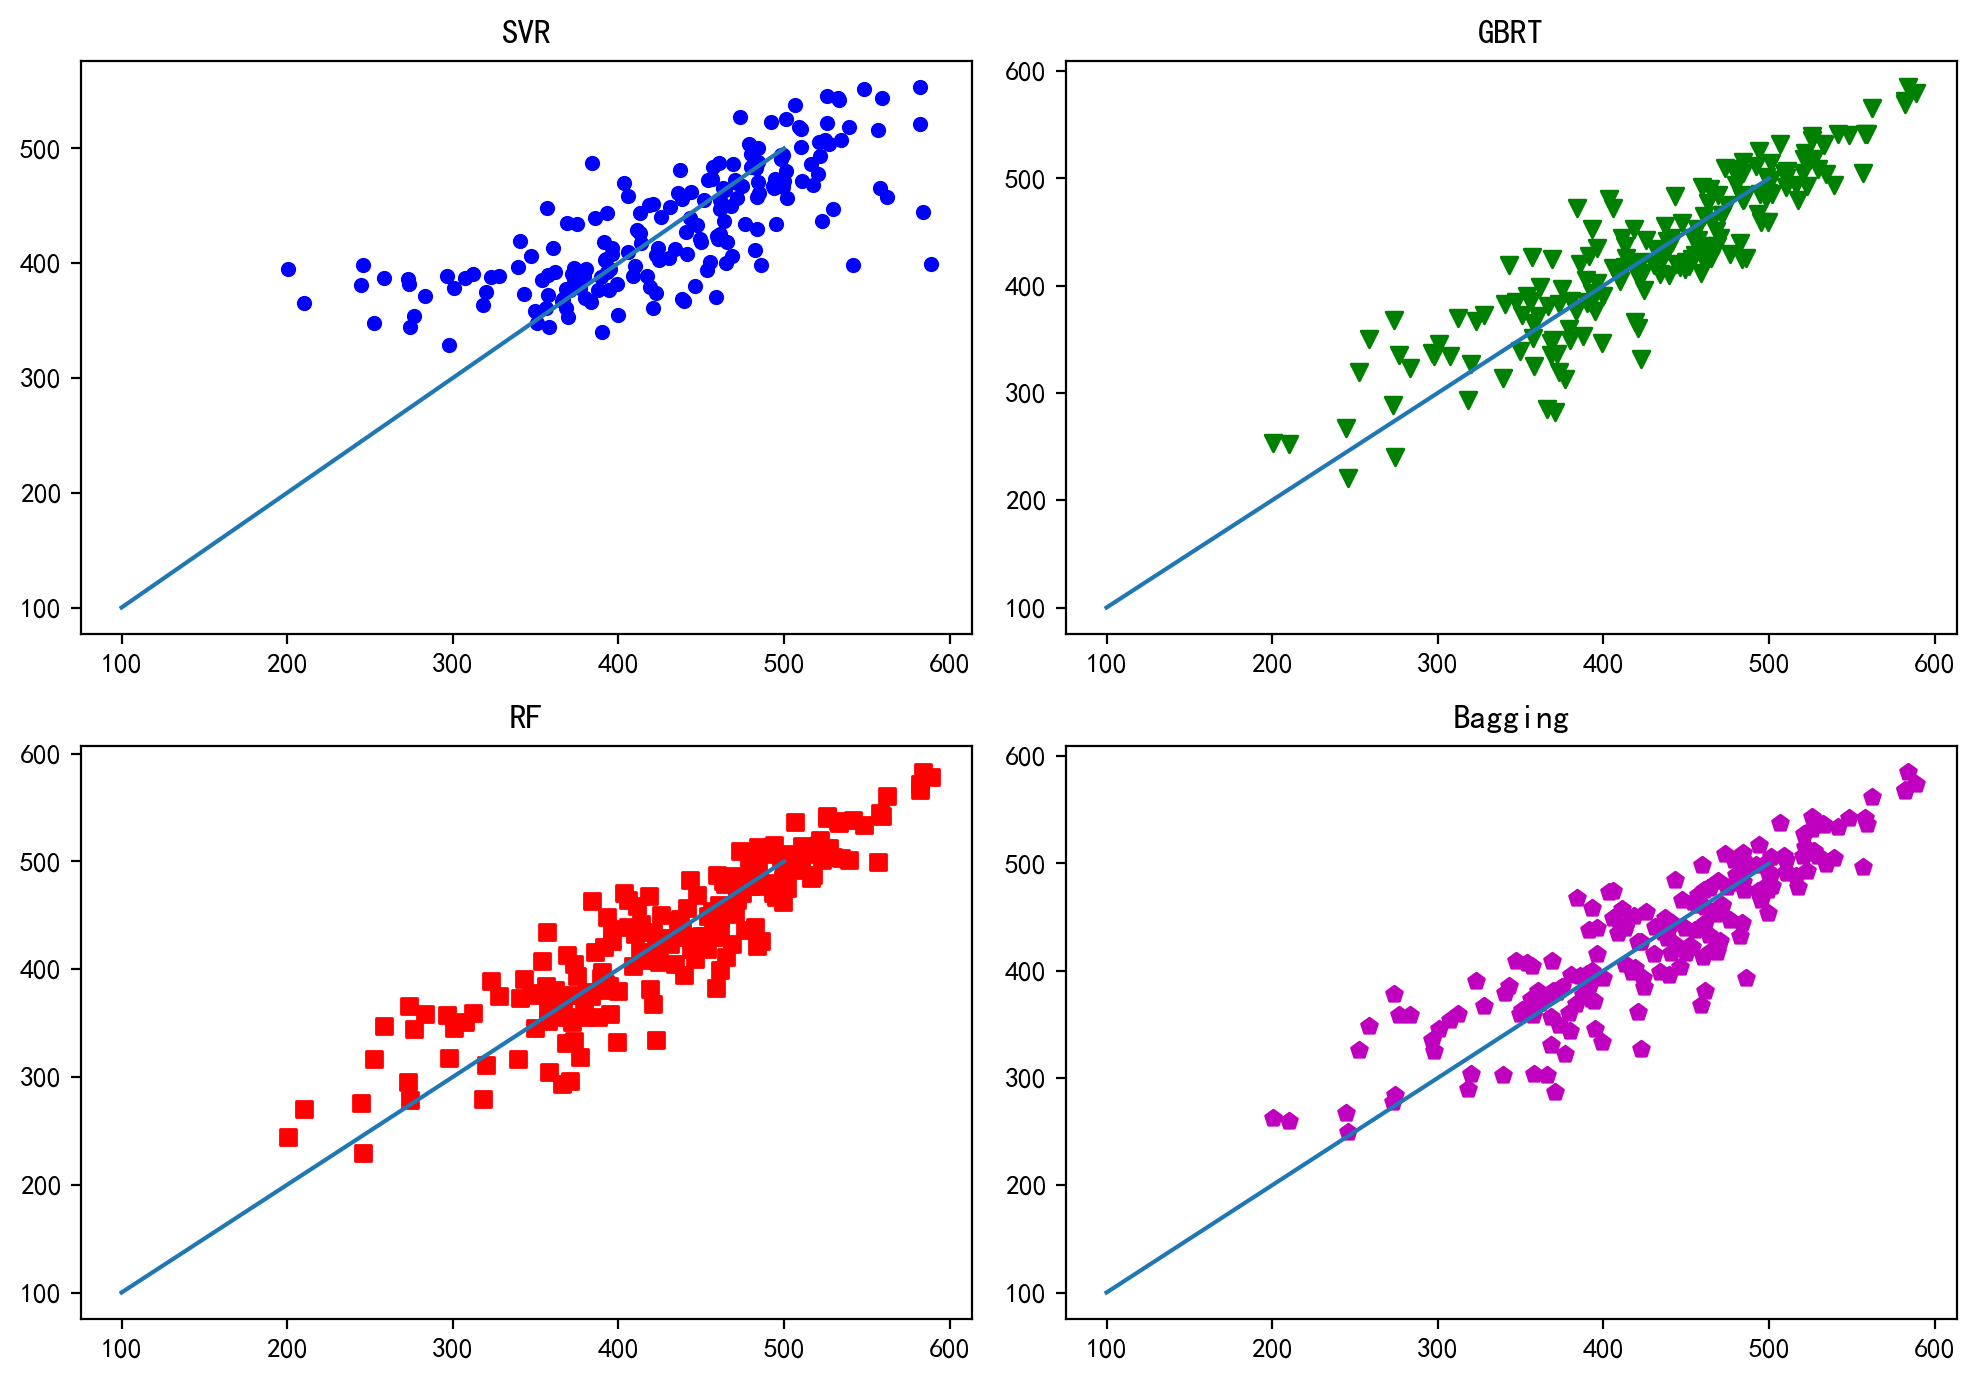

In [131]:
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.scatter(y_test, SVR_y_predict, label = 'SVR',marker='o',c='b',s=20)
plt.title("SVR")
plt.plot((100,500),(100,500))
plt.subplot(2, 2, 2)
plt.scatter(y_test, GBRT_y_predict, label = 'GBRT',marker='v',c='g')
plt.title("GBRT")
plt.plot((100,500),(100,500))
plt.subplot(2, 2, 3)
plt.scatter(y_test, RF_y_predict, label = 'RF',marker='s',c='r')
plt.title("RF")
plt.plot((100,500),(100,500))
plt.subplot(2, 2, 4)
plt.scatter(y_test, bagging_y_predict, label = 'Bagging',marker='p',c='m')
plt.title("Bagging")
plt.plot((100,500),(100,500))
plt.tight_layout()
plt.savefig('E:/7.jpg')
#plt.savefig('E:/PYTHONtu/7.jpg') 
#plt.legend(loc='best')
#plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4,label='predicted')
plt.show()

In [132]:
# (pd.DataFrame(SVR_y_predict)).to_csv('8_SVR_y_predict.csv')
# (pd.DataFrame(GBRT_y_predict)).to_csv('8_GBRT_y_predict.csv')
# (pd.DataFrame(RF_y_predict)).to_csv('8_RF_y_predict.csv')
# (pd.DataFrame(bagging_y_predict)).to_csv('8_bagging_y_predict.csv')

print('fine')

fine


[0.00070513 0.00172698 0.0018727  0.00258134 0.00367228 0.00691564
 0.01110641 0.01152956 0.01423649 0.01672386 0.02764373 0.04842158
 0.39236473 0.46049958]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

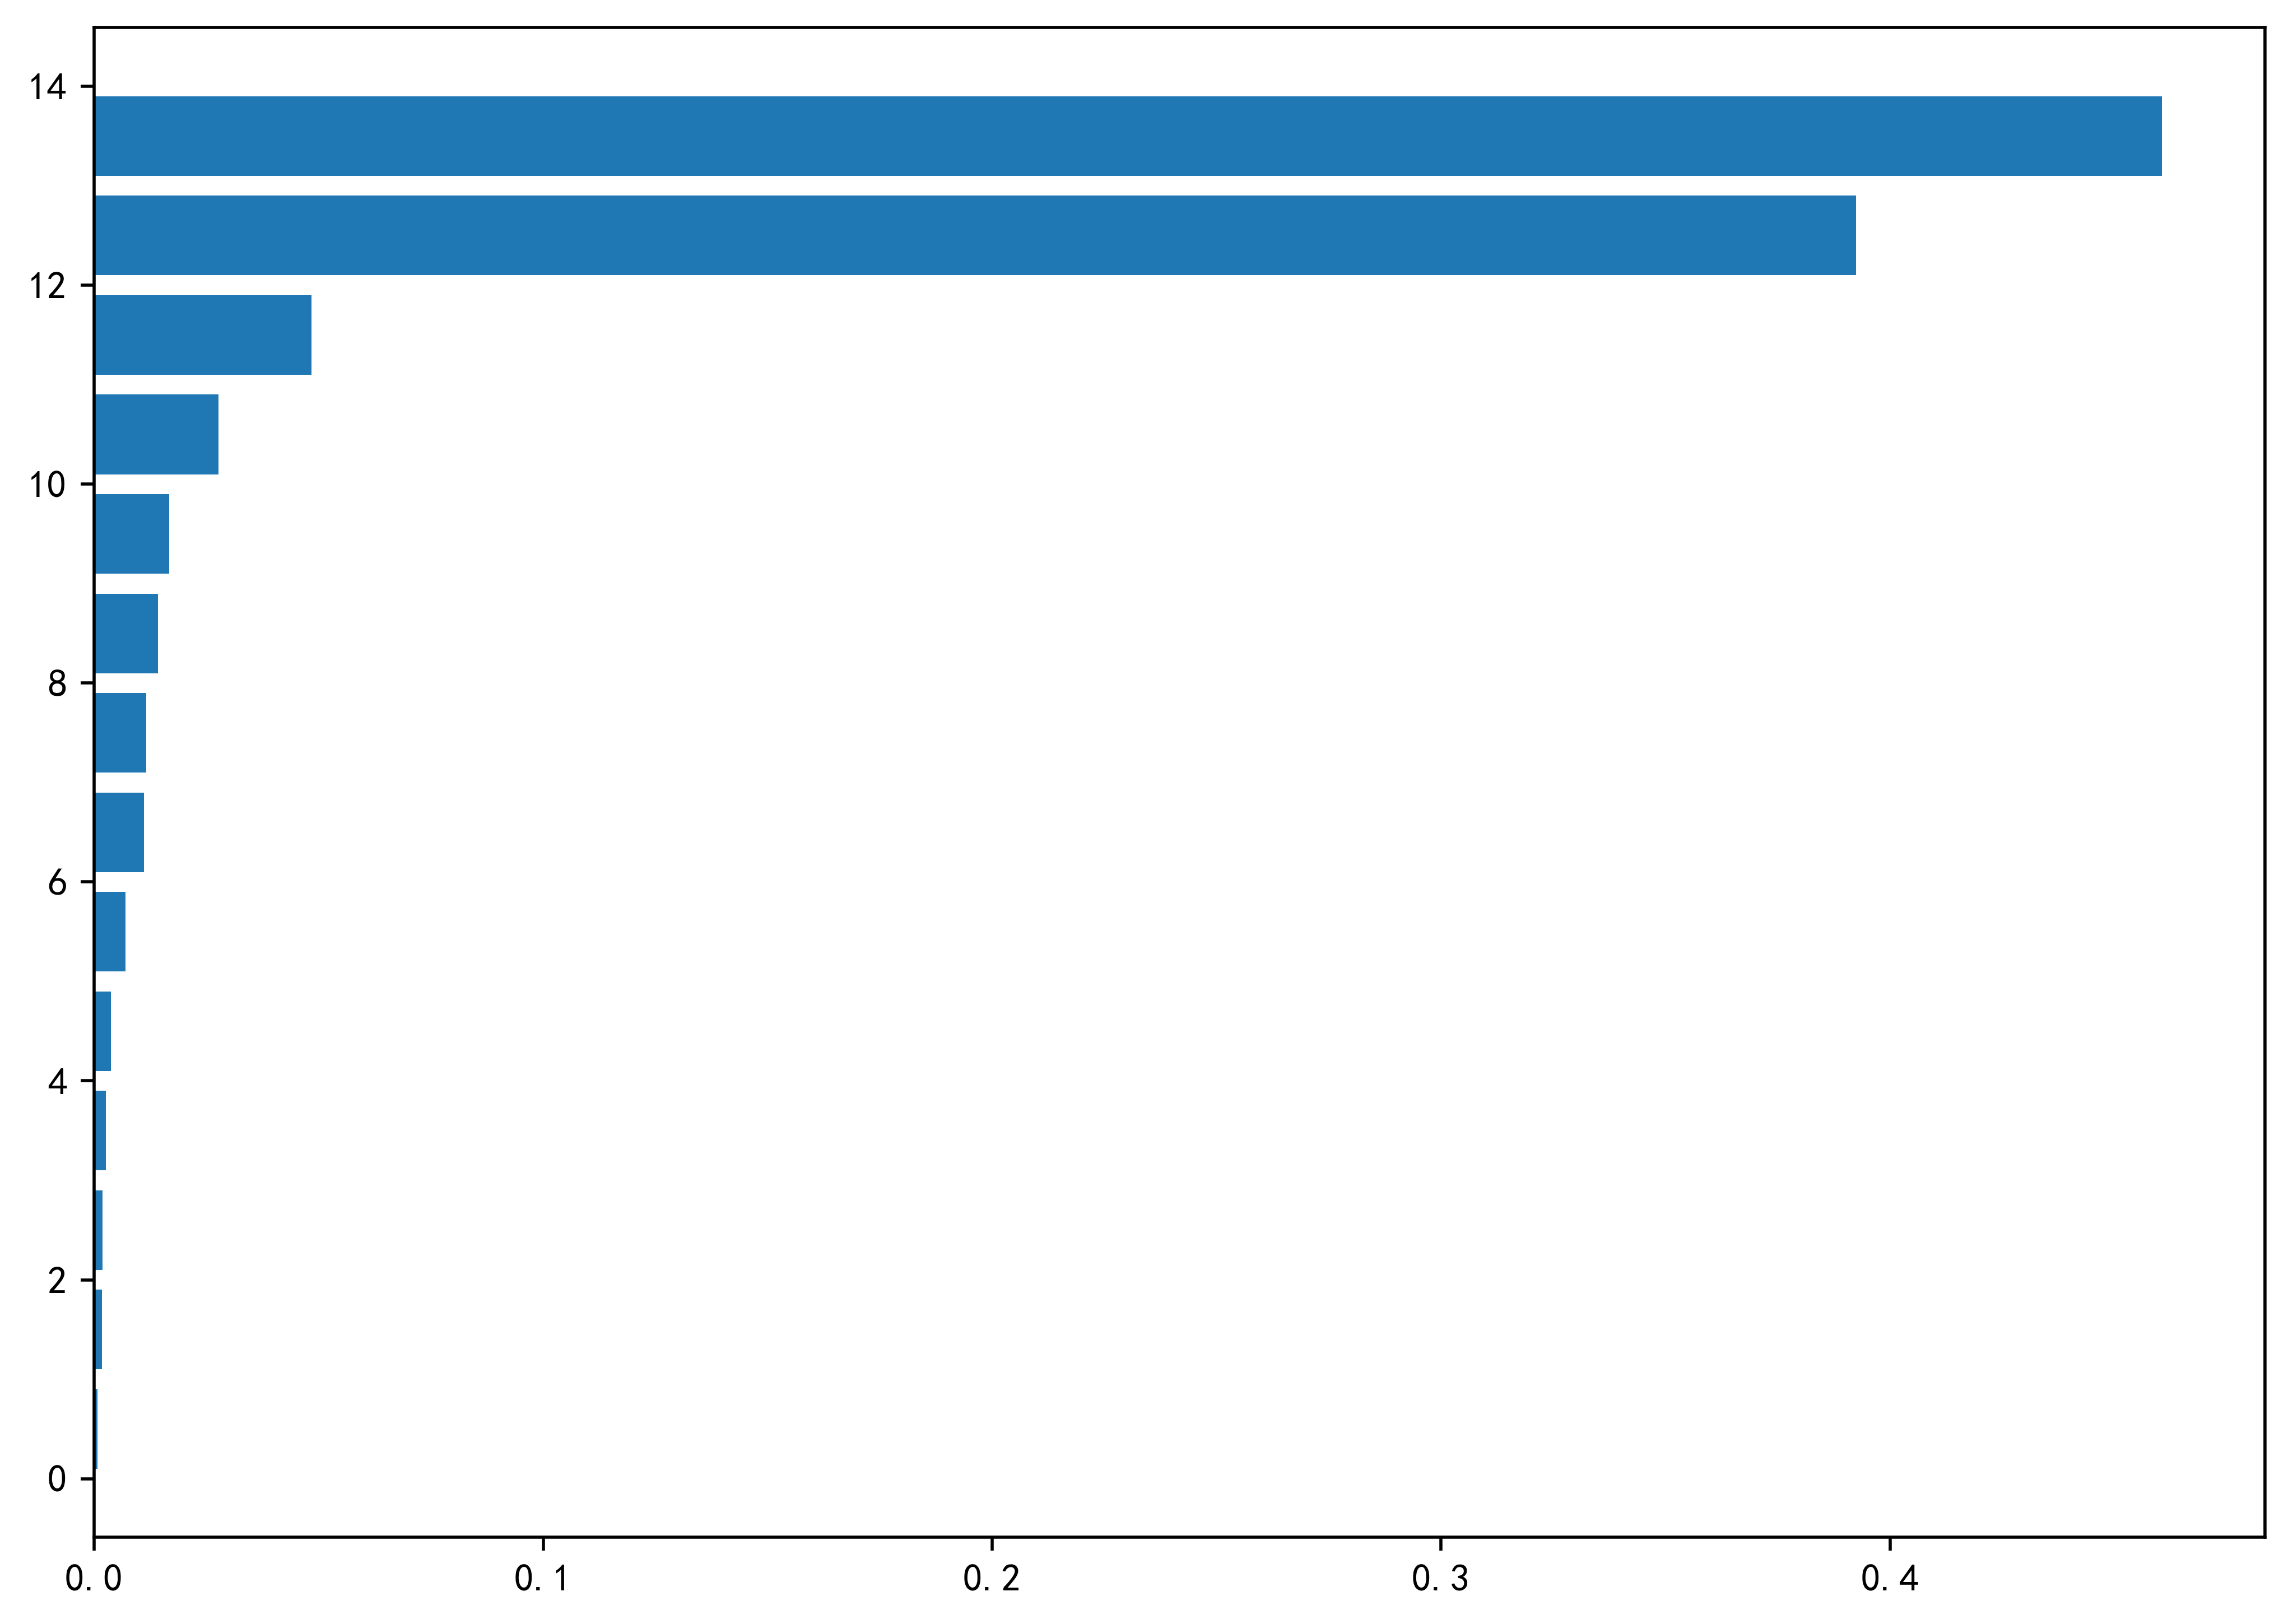

In [133]:
plt.style.use({'figure.figsize':(10,7)})
feature_im = GBRT.feature_importances_
sorted_idx = np.argsort(feature_im)
#print(x.columns[sorted_idx])
print(feature_im[sorted_idx])
#print(sorted_idx)
#print()
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(dpi=500)
plt.barh(pos, feature_im[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.savefig('E:/PYTHONtu/1.jpg')
plt.show()
print('fine')

score = []
x_impor = []
for i in range(0, 23):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)
    GBRT.fit(x_train, y_train)
    score = np.append(score, GBRT.score(x_test, y_test))
    feature_im = GBRT.feature_importances_
    sorted_idx = np.argsort(feature_im)
    print(x.columns[sorted_idx[0]])
    x = x.drop(x.columns[sorted_idx[0]], axis=1)
    # print(x.shape)
print(score)
print(np.where(score == score.max()))
# (pd.DataFrame(score)).to_csv('9-score-3-last4.csv')

import pylab as plt
plt.scatter(range(0, 23), score)
plt.show()

print('fine')